<a href="https://colab.research.google.com/github/hmustafa9/Text_Blob_vs_NLTK/blob/main/Bonus_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
tweets=pd.read_csv('/content/tweets.csv',encoding_errors='ignore')

In [ ]:
len(tweets)

4000

In [ ]:
tweets.head()

,Unnamed: 0,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
0,1,RT @KarnaMikko: I guess #Spain will next ban #...,False,0,NaN,2017-11-30 23:59:14,False,NaN,936384156480823297,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",SansaJordi,637,True,False,NaN,NaN
1,2,RT @KarnaMikko: I guess #Spain will next ban #...,False,0,NaN,2017-11-30 23:58:58,False,NaN,936384087249641473,NaN,"<a href=""http://twitter.com/download/android"" ...",escatxic1,637,True,False,NaN,NaN
2,3,RT @KarnaMikko: I guess #Spain will next ban #...,False,0,NaN,2017-11-30 23:57:29,False,NaN,936383713759432704,NaN,"<a href=""http://twitter.com/download/iphone"" r...",ergoal,637,True,False,NaN,NaN
3,4,RT @jurgenvontopfer: Heard rumours that yellow...,False,0,NaN,2017-11-30 23:57:07,False,NaN,936383621031694336,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Jbuehler777,31,True,False,NaN,NaN
4,5,RT @KarnaMikko: I guess #Spain will next ban #...,False,0,NaN,2017-11-30 23:56:33,False,NaN,936383479889133570,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",miquibricu,637,True,False,NaN,NaN


In [ ]:
data=tweets[['text']]

In [ ]:
def remove_invalid_characters(text):
    # Use a regular expression to match and remove invalid characters
    cleaned_text = re.sub(r'<[^>]+>', '', text)
    return cleaned_text

In [ ]:
data['text']=data['text'].apply(remove_invalid_characters)

<ipython-input-8-6e1d4db3fd8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text']=data['text'].apply(remove_invalid_characters)


In [ ]:
def extract_text(s):
    split_text = s.split(':', 1)
    if len(split_text) > 1:
        return split_text[1]
    else:
        return split_text[0]

In [ ]:
data['text']=data['text'].apply(extract_text)

<ipython-input-28-73c21eb8ffc4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text']=data['text'].apply(extract_text)


In [ ]:
analyser = SentimentIntensityAnalyzer()

In [ ]:
%time # to calulate the time it takes the algorithm to compute a VADER score
i=0 # counter

compval1 = [ ] # empty list to hold our computed 'compound' VADER scores

while (i<len(data)):

    k = analyser.polarity_scores(data.iloc[i]['text'])
    compval1.append(k['compound'])

    i = i+1

# convert sentiment values to numpy for easier usage
compval1 = np.array(compval1)
len(compval1)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 4.53 µs


4000

In [ ]:
data['VADER score'] = compval1

<ipython-input-31-f71f9c5f6ae7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['VADER score'] = compval1


In [ ]:
%time

# assign score categories and logic
i = 0

predicted_value = [ ] # empty series to hold our predicted values

while(i<len(data)):
    if ((data.iloc[i]['VADER score'] >= 0.5)):
        predicted_value.append('positive')
        i = i+1
    elif ((data.iloc[i]['VADER score'] > 0) & (data.iloc[i]['VADER score'] < 0.5)):
        predicted_value.append('neutral')
        i = i+1
    elif ((data.iloc[i]['VADER score'] <= 0)):
        predicted_value.append('negative')
        i = i+1

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


In [ ]:
data['predicted sentiment'] = predicted_value

<ipython-input-33-af8d3bfb9c90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predicted sentiment'] = predicted_value


In [ ]:
data.head(10)

,text,VADER score,predicted sentiment,TextBlobSub,TextBlobPol,SentimentTBlob
0,I guess #Spain will next ban #Catalonia's fla...,-0.7425,negative,0.300000,-0.200000,negative
1,I guess #Spain will next ban #Catalonia's fla...,-0.7425,negative,0.300000,-0.200000,negative
2,I guess #Spain will next ban #Catalonia's fla...,-0.7425,negative,0.300000,-0.200000,negative
3,Heard rumours that yellow is being banned in ...,-0.4404,negative,0.301136,0.121591,neutral
4,I guess #Spain will next ban #Catalonia's fla...,-0.7425,negative,0.300000,-0.200000,negative
5,I guess #Spain will next ban #Catalonia's fla...,-0.7425,negative,0.300000,-0.200000,negative
6,I guess #Spain will next ban #Catalonia's fla...,-0.7425,negative,0.300000,-0.200000,negative
7,I guess #Spain will next ban #Catalonia's fla...,-0.7425,negative,0.300000,-0.200000,negative
8,I guess #Spain will next ban #Catalonia's fla...,-0.7425,negative,0.300000,-0.200000,negative
9,#Catalonia Electoral Commission has banned th...,-0.4588,negative,0.000000,0.000000,negative


# Changing Libraries

In [ ]:
!pip install -U textblob
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [ ]:
from textblob import TextBlob

In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
data['TextBlobSub']=data['text'].apply(getSubjectivity)
data['TextBlobPol']=data['text'].apply(getPolarity)

<ipython-input-38-b89e00a5f30f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TextBlobSub']=data['text'].apply(getSubjectivity)
<ipython-input-38-b89e00a5f30f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TextBlobPol']=data['text'].apply(getPolarity)


In [ ]:
data.head()

,text,VADER score,predicted sentiment,TextBlobSub,TextBlobPol,SentimentTBlob
0,I guess #Spain will next ban #Catalonia's fla...,-0.7425,negative,0.300000,-0.200000,negative
1,I guess #Spain will next ban #Catalonia's fla...,-0.7425,negative,0.300000,-0.200000,negative
2,I guess #Spain will next ban #Catalonia's fla...,-0.7425,negative,0.300000,-0.200000,negative
3,Heard rumours that yellow is being banned in ...,-0.4404,negative,0.301136,0.121591,neutral
4,I guess #Spain will next ban #Catalonia's fla...,-0.7425,negative,0.300000,-0.200000,negative


In [ ]:
%time

# assign score categories and logic
i = 0

predicted_value = [ ] # empty series to hold our predicted values

while(i<len(data)):
    if ((data.iloc[i]['TextBlobPol'] >= 0.5)):
        predicted_value.append('positive')
        i = i+1
    elif ((data.iloc[i]['TextBlobPol'] >0) & (data.iloc[i]['TextBlobPol'] < 0.5)):
        predicted_value.append('neutral')
        i = i+1
    elif ((data.iloc[i]['TextBlobPol'] <= 0)):
        predicted_value.append('negative')
        i = i+1

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


In [ ]:
data['SentimentTBlob'] = predicted_value

<ipython-input-41-93261ab54c13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SentimentTBlob'] = predicted_value


<Axes: >

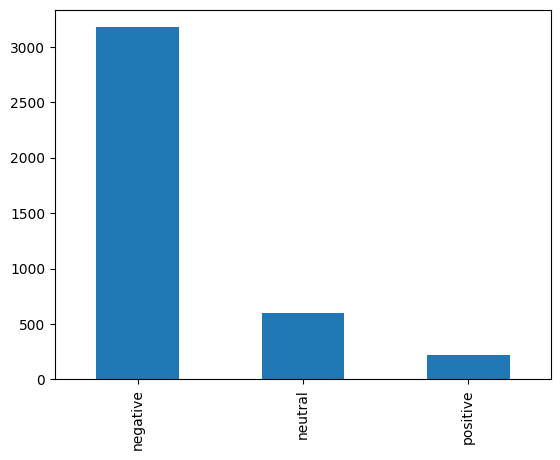

In [ ]:
data.SentimentTBlob.value_counts().plot(kind='bar')

<Axes: >

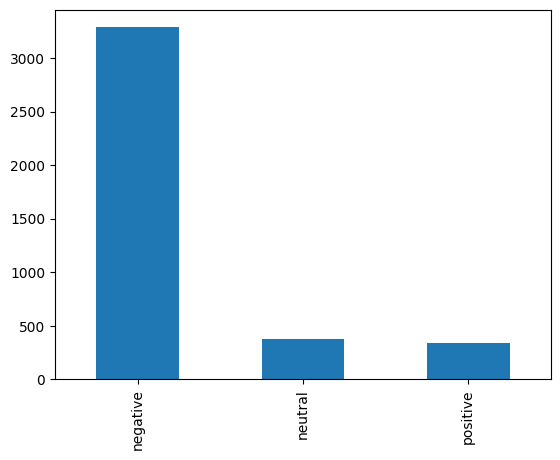

In [ ]:
data['predicted sentiment'].value_counts().plot(kind='bar')

In [ ]:
data

,text,VADER score,predicted sentiment,TextBlobSub,TextBlobPol,SentimentTBlob
0,I guess #Spain will next ban #Catalonia's fla...,-0.7425,negative,0.300000,-0.200000,negative
1,I guess #Spain will next ban #Catalonia's fla...,-0.7425,negative,0.300000,-0.200000,negative
2,I guess #Spain will next ban #Catalonia's fla...,-0.7425,negative,0.300000,-0.200000,negative
3,Heard rumours that yellow is being banned in ...,-0.4404,negative,0.301136,0.121591,neutral
4,I guess #Spain will next ban #Catalonia's fla...,-0.7425,negative,0.300000,-0.200000,negative
...,...,...,...,...,...,...
3995,"The Spanish ""democracy"" forbids the yellow aw...",-0.5106,negative,0.000000,0.000000,negative
3996,//t.co/c7ylYl0N42,0.0000,negative,0.000000,0.000000,negative
3997,//t.co/f6oUiQfC9u,0.0000,negative,0.000000,0.000000,negative
3998,"The Spanish ""democracy"" forbids the yellow aw...",-0.5106,negative,0.000000,0.000000,negative


In [ ]:
data.to_csv('expot.csv')

Conclusion:
Comapring the two libraries we can see that they behave relatively simmilar.A big part of that is our threshhold definition for the numeric scores. However there is difference between the positive and negative classes of the two results. Below is a visualization of our results. Where bubble size corresponds to teh socre magnitude.
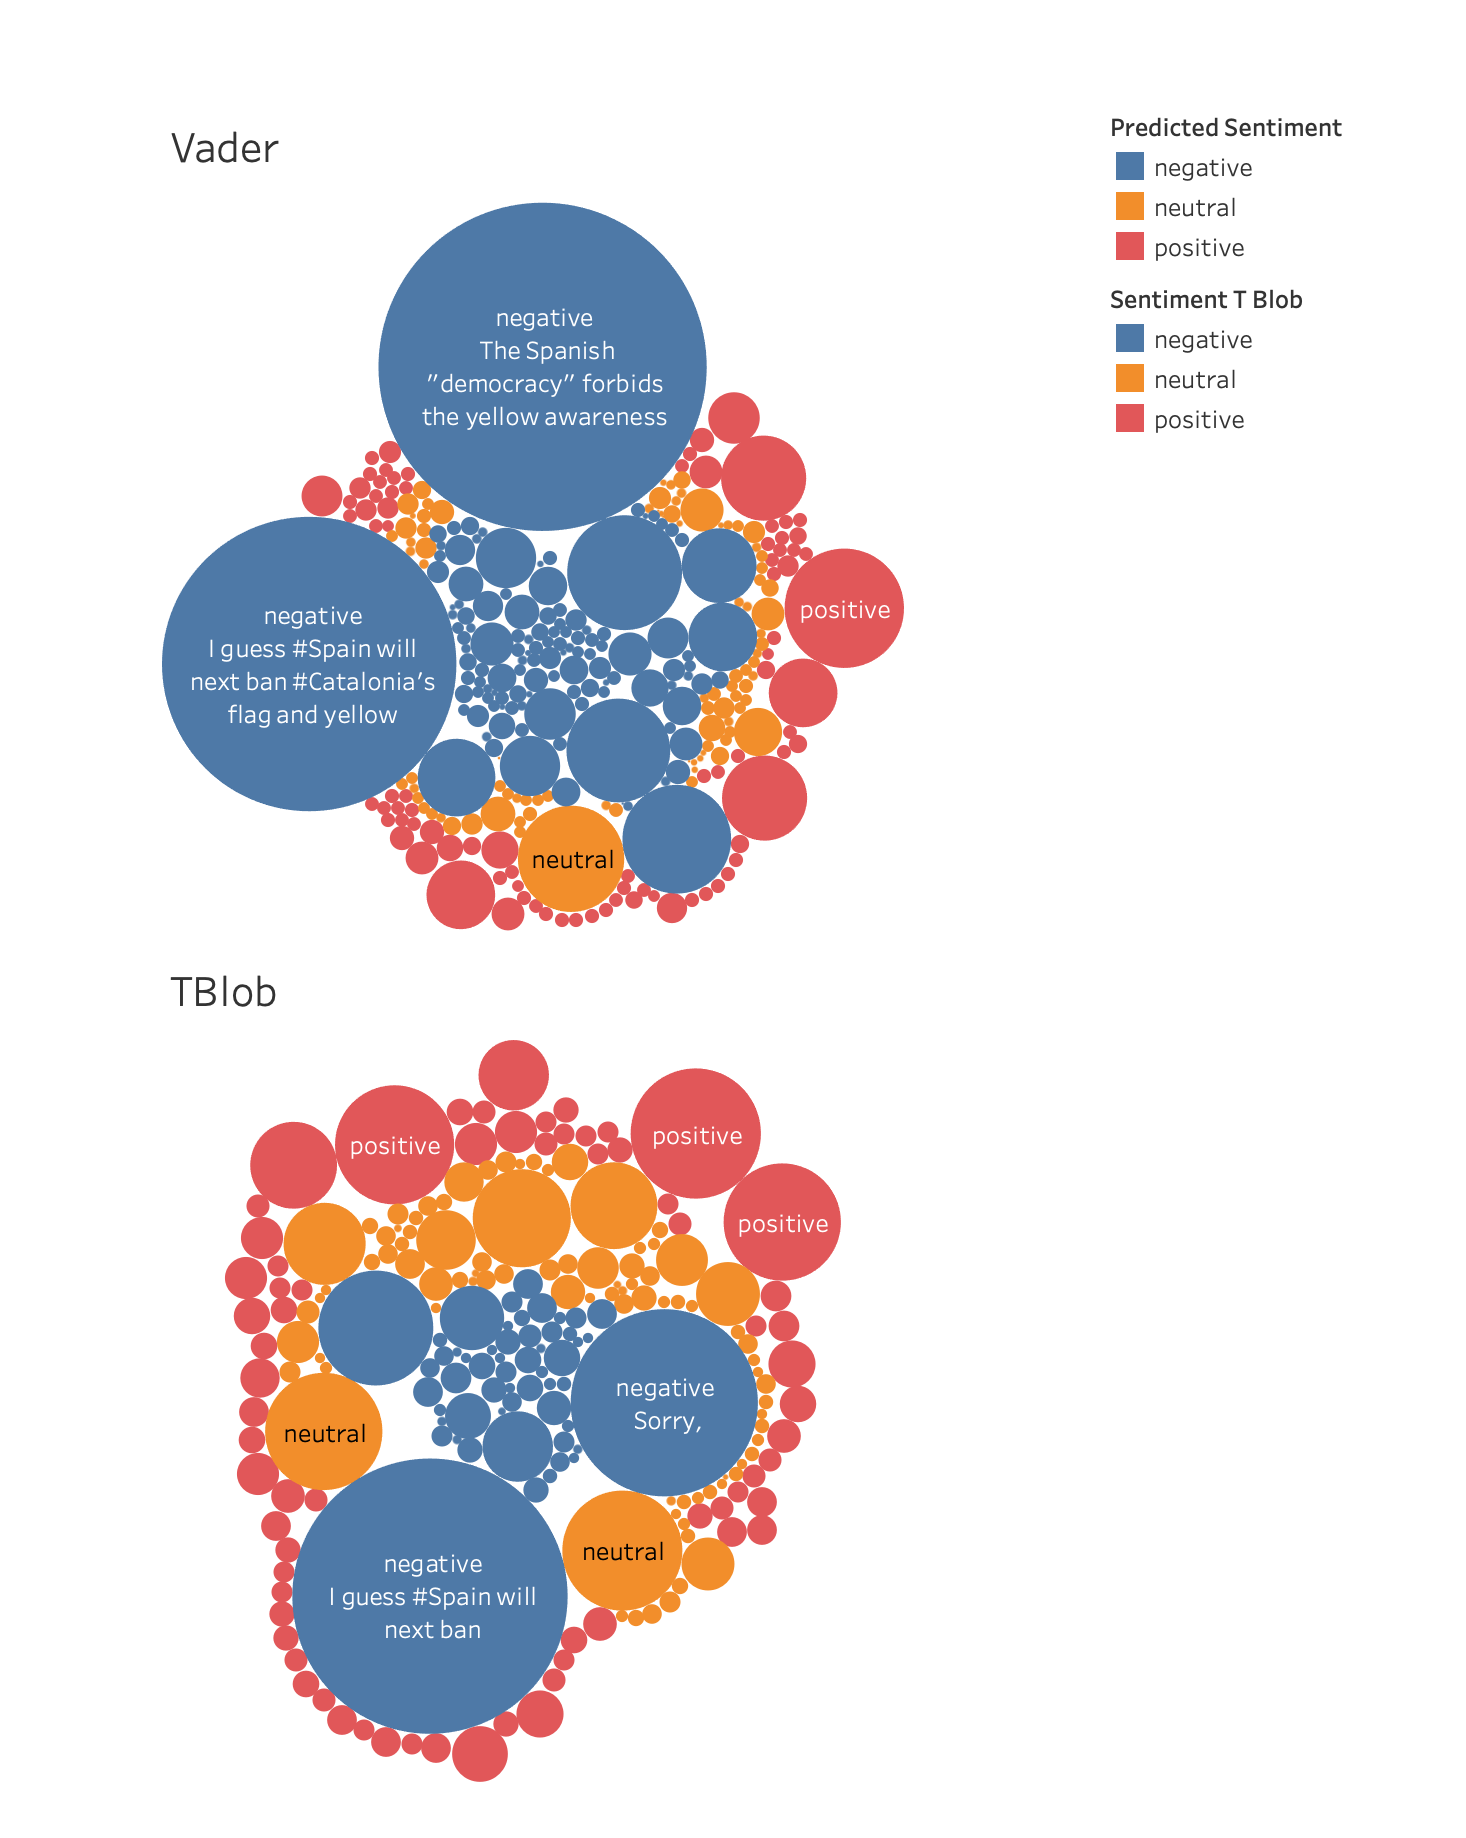